In [63]:
import os
import pandas as pd
import numpy as np

In [3]:
data_dir = '/home/amansinha/Downloads/data/time-series/Le CAC et ses 7 majors 2021-Aman/'

os.listdir(data_dir)

['OR.FR-d-20200701.csv',
 'BNP.FR-d-20200701.csv',
 'MC.FR-d-20200701.csv',
 'AIR.FR-d-20200701.csv',
 'FP.FR-d-20200701.csv',
 'DG.FR-d-20200701.csv',
 'Fra40-20200102.csv',
 'SAN.FR-d-20200701.csv',
 '.DS_Store']

In [4]:
df = pd.read_csv(data_dir + 'BNP.FR-d-20200701.csv', sep=' ', names=['name', 'date', 'time', 'val', 'extra'])
df.drop('extra', axis=1, inplace=True)

df['datetime'] = df[['date', 'time']].agg(' '.join, axis=1)
df['datetime'] = df['datetime'].astype('datetime64[ns]')

df.drop(['date', 'time'], axis=1, inplace=True)

df

,name,val,datetime
0,BNP.FR-d,35.43,2020-01-07 09:00:00
1,BNP.FR-d,35.42,2020-01-07 09:00:15
2,BNP.FR-d,35.42,2020-01-07 09:00:30
3,BNP.FR-d,35.41,2020-01-07 09:00:45
4,BNP.FR-d,35.41,2020-01-07 09:01:00
...,...,...,...
248997,BNP.FR-d,29.94,2020-10-30 17:29:00
248998,BNP.FR-d,29.92,2020-10-30 17:29:15
248999,BNP.FR-d,29.91,2020-10-30 17:29:30
249000,BNP.FR-d,29.91,2020-10-30 17:29:45


<AxesSubplot:xlabel='datetime'>

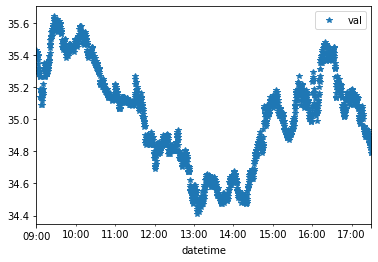

In [63]:
df[:2041].plot(x='datetime', y='val', style='*')

<AxesSubplot:xlabel='datetime'>

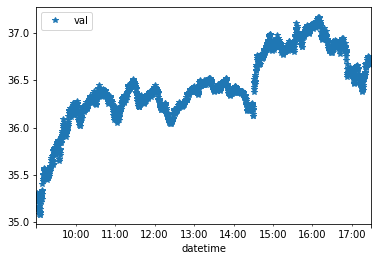

In [59]:
df[2042: 4080].plot(x='datetime', y='val', style='*')

# Time Series Classes

In [66]:
class TSElement(object):
    def __init__(self,dt, val=0):
        self.dt = dt
        self.val = val
        
    def __str__(self):
        string = []
        
        id_dt= self.dt
        string.append(f'Datetime: {self.dt}')
        
        id_val = self.val
        string.append(f'Value : {self.val}')
        
        return string
    
#    def __mean__(self, other):
 #       if (isinstance(other, TSElement)):
  #          return other.val + self.val
        
   #     except AttributeError:          

class TimeSeriesData:
    def __init__(self, df, name, h=3):
        self.name = name
        self.h = h
        self.instances = None
        #self.bs = bs
        
    def __len__(self):
        return len(df) - self.h
    
    def prepare_data(self):
        l = list(zip(df['datetime'],df['val']))
        self.instances  = [[TSElement(*o) for o in l[i:i+self.h]] for i,e in enumerate(l) if (i+self.h) < len(df)]
        print('Size of Dataset:', len(self.instances))
    
    def avg_baseline(self):
        
        predictions = []
        truths = []
        
        for instance in self.instances:
            seq = instance[:-1]
            truths.append(instance[-1].val)
            predictions.append(np.mean([ins.val for ins in seq]))
            
        return truths, predictions


In [97]:
ts = TimeSeriesData(df, name='BNP', h=10)
ts.prepare_data()
t,p = ts.avg_baseline()

Size of Dataset: 248992


In [98]:
# uncomment to see 
diff = []
for tt,pp in zip(t,p):
    diff.append(abs(tt-pp))
np.mean(diff)

0.016759190835225507

# sequence length (h-1) vs mean_abs_diff

||h|avg_abs_diff|
|---|---|---|
||4|0.0116019|
||5|0.0126558|
||6|0.0135694|
||7|0.0144012|
||8|0.015213|
||9|0.015998|
||10|0.01675|

In [74]:
import matplotlib.pyplot as plt

100 100 100


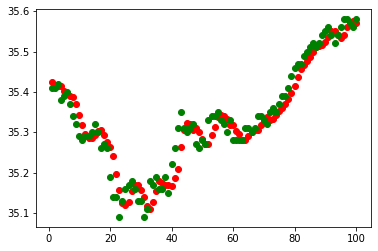

In [84]:
# h = 4

x = list(range(1,248999))[:100]
y1 = p[:100]
y2 = t[:100]
print(len(x), len(y1), len(y2))
plt.scatter(x, y1, c = 'red')# prediction
plt.scatter(x, y2, c = 'green')# truth